In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodcom-recipes-and-reviews/recipes.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.csv
/kaggle/input/foodcom-recipes-and-reviews/recipes.csv


In [2]:
import pandas as pd

# Load the recipes CSV file
recipes_df = pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/recipes.csv')

print(recipes_df.columns)

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


In [3]:
recipes_df.RecipeYield

0                    NaN
1                    NaN
2                    NaN
3               4 kebabs
4                    NaN
               ...      
522512    1 8x8 cake pan
522513           1 Roast
522514               NaN
522515          20 rolls
522516               NaN
Name: RecipeYield, Length: 522517, dtype: object

In [4]:
# the columns i need
columns_to_keep = [
    "RecipeId", "Name", "CookTime", "PrepTime", "TotalTime", "Description",
    "Images", "RecipeCategory", "Keywords",
    "RecipeIngredientQuantities", "RecipeIngredientParts",
    "RecipeServings", "RecipeInstructions", "Calories"
]

recipes_df = recipes_df[columns_to_keep]

# Check result
print(recipes_df.columns)

Index(['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description',
       'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities',
       'RecipeIngredientParts', 'RecipeServings', 'RecipeInstructions',
       'Calories'],
      dtype='object')


In [5]:
recipes_df.isnull().sum()

RecipeId                           0
Name                               0
CookTime                       82545
PrepTime                           0
TotalTime                          0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
RecipeServings                182911
RecipeInstructions                 0
Calories                           0
dtype: int64

In [6]:
recipes_df.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeServings,RecipeInstructions,Calories
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",170.9
1,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",6.0,"c(""Soak saffron in warm milk for 5 minutes and...",1110.7
2,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",311.1
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",2.0,"c(""Drain the tofu, carefully squeezing out exc...",536.1
4,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.0,"c(""Mix everything together and bring to a boil...",103.6


In [7]:
# Renaming the columns to better names

col_rename = {
    "RecipeId": "recipe_id",
    "Name": "title",
    "CookTime": "cook_time",
    "PrepTime": "prep_time",
    "TotalTime": "total_time",
    "RecipeCategory": "category",
    "Keywords": "keywords",
    "Description": "description",
    "Images": "image_url",
    "RecipeIngredientQuantities": "ingredient_qty",
    "RecipeIngredientParts": "ingredient_name",
    "RecipeServings": "servings",
    "RecipeInstructions": "instructions",
    "Calories": "calories"
}
filtered_cols = list(col_rename.keys())


recipes_df = recipes_df[filtered_cols].rename(columns=col_rename)

In [8]:
recipes_df.columns

Index(['recipe_id', 'title', 'cook_time', 'prep_time', 'total_time',
       'category', 'keywords', 'description', 'image_url', 'ingredient_qty',
       'ingredient_name', 'servings', 'instructions', 'calories'],
      dtype='object')

In [9]:
recipes_df = recipes_df.drop(columns=['keywords'])

# i have decide to remove keywords columns for more simplicity

In [10]:
recipes_df.isnull().sum()

recipe_id               0
title                   0
cook_time           82545
prep_time               0
total_time              0
category              751
description             5
image_url               1
ingredient_qty          3
ingredient_name         0
servings           182911
instructions            0
calories                0
dtype: int64

In [11]:
# lets see what the recipes are for which the description is empty

recipes_df[recipes_df['description'].isna() | (recipes_df['description'] == '')]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,recipe_id,title,cook_time,prep_time,total_time,category,description,image_url,ingredient_qty,ingredient_name,servings,instructions,calories
3416,5177,Herb Pull-Aparts,NaN,PT0S,PT0S,Breads,NaN,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""1 1/2"", ""1/4"", ""1"", ""1"", ""1"", ""1"", ""1"", ""1/4"")","c(""butter"", ""margarine"", ""parmesan cheese"", ""r...",24.0,"c(""Grease a fluted tube Bundt pan."", ""combine ...",35.5
3526,5300,Chicken Liver Parfait,NaN,PT0S,PT0S,Chicken Livers,NaN,character(0),"c(""2"", ""1 1/2"", ""900"", ""9"", ""8"", ""1"", NA)","c(""sweet sherry"", ""chicken livers"", ""eggs"", ""n...",1.0,"c(""Bring cream to simmering point. Puree all o...",4650.2
3645,5428,Hot Swiss Chard Salad,NaN,PT0S,PT0S,Swiss,NaN,NaN,"c(""1"", ""1/3"", ""10 -12"", ""1/4"", ""1/4"", NA, ""2"",...","c(""garlic"", ""fresh swiss chard"", ""red wine vin...",1.0,"c(""Marinate garlic clove in oil for 1 hour."", ...",928.6
4590,7426,Hidden Valley Mix for Dressing(copycat),NaN,PT0S,PT0S,Salad Dressings,NaN,character(0),"c(""2"", ""1/2"", ""1"", ""1"", ""1/2"", ""1"", ""1"")","c(""salt"", ""garlic powder"", ""parsley flakes"", ""...",NaN,"c(""Mix instant onion mix, salt, garlic powder,...",119.9
4591,7427,Cranberry Cocktail Meatballs,NaN,PT0S,PT0S,Fruit,NaN,character(0),"c(""2"", ""1"", ""2"", ""1/2"", ""1/3"", ""3"", ""2"", ""1/4""...","c(""beef"", ""eggs"", ""parsley"", ""ketchup"", ""onion...",6.0,"c(""In a large bowl, combine ground beef, cornf...",1264.1


In [12]:
# lets check the columns with empty values
# cook_time, category, description, image_url, servings

recipes_df[['title','cook_time', 'category', 'servings']][8:15]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,cook_time,category,servings
8,A Jad - Cucumber Pickle,NaN,Vegetable,NaN
9,Butter Pecan Cookies,PT9M,Dessert,NaN
10,Boston Cream Pie,NaN,Pie,8.0
11,Chicken Breasts Lombardi,PT30M,Chicken Breast,6.0
12,Biscotti Di Prato,PT50M,Dessert,NaN
13,Chai Tea,PT25M,Beverages,4.0
14,Cafe Cappuccino,NaN,Beverages,18.0


In [13]:
# Fill missing values in category with placeholder (Unknown)
recipes_df['category'] = recipes_df['category'].fillna("Unknown")

In [14]:
recipes_df['image_url'][0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

In [15]:
# the other columns containing empty values are - desciption, image_url, and ingredient_qty

recipes_df['description'] = recipes_df['description'].fillna("")
recipes_df['image_url'] = recipes_df['image_url'].fillna("")
recipes_df['ingredient_qty'] = recipes_df['ingredient_qty'].fillna("[]")
recipes_df['cook_time'] = recipes_df['cook_time'].fillna("")
recipes_df['servings'] = recipes_df['servings'].fillna("")


In [16]:
recipes_df.isnull().sum()

recipe_id          0
title              0
cook_time          0
prep_time          0
total_time         0
category           0
description        0
image_url          0
ingredient_qty     0
ingredient_name    0
servings           0
instructions       0
calories           0
dtype: int64

In [17]:
recipes_df['image_url'][4:10]

# each value is a list of image urls

4    "https://img.sndimg.com/food/image/upload/w_55...
5                                         character(0)
6    "https://img.sndimg.com/food/image/upload/w_55...
7    "https://img.sndimg.com/food/image/upload/w_55...
8                                         character(0)
9    c("https://img.sndimg.com/food/image/upload/w_...
Name: image_url, dtype: object

In [18]:
import re

def extract_first_image_url(raw):
    """Clean R-style vector string or markdown URL entry and return the first usable image URL."""
    if not isinstance(raw, str) or "character(0" in raw or raw.strip() == "":
        return ""  # Treat character(0 or empty as missing
    
    cleaned = re.sub(r'^c\(|\)$', '', raw).strip()  # remove surrounding c(...) from strings
    # Split by , and strip extra quotes
    parts = re.split(r'"\s*,\s*"', cleaned.strip('"'))

    # Extract from markdown if exists, otherwise use raw part
    first = parts[0].strip()
    match = re.search(r'\[(https?://.*?)\]', first)  # Markdown style: [url](url)
    return match.group(1) if match else first

# Apply the cleaning function to the 'image_url' column
recipes_df['image_url'] = recipes_df['image_url'].apply(extract_first_image_url)


In [19]:
recipes_df['image_url'][4:10]

4    https://img.sndimg.com/food/image/upload/w_555...
5                                                     
6    https://img.sndimg.com/food/image/upload/w_555...
7    https://img.sndimg.com/food/image/upload/w_555...
8                                                     
9    https://img.sndimg.com/food/image/upload/w_555...
Name: image_url, dtype: object

In [20]:
url = recipes_df['image_url'][9]

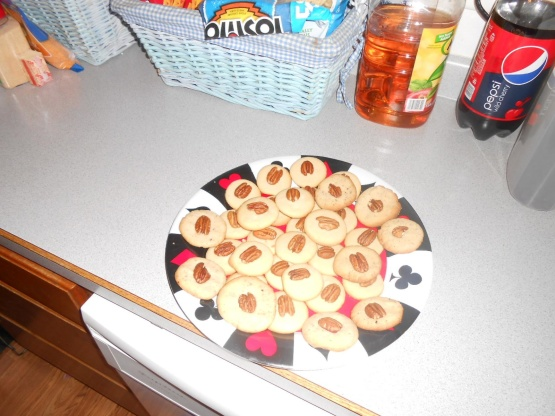

In [21]:
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO

# Download the image from the direct URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display in notebook
display(img)

In [22]:
recipes_df.head()

,recipe_id,title,cook_time,prep_time,total_time,category,description,image_url,ingredient_qty,ingredient_name,servings,instructions,calories
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,https://img.sndimg.com/food/image/upload/w_555...,"c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",170.9
1,39,Biryani,PT25M,PT4H,PT4H25M,Chicken Breast,Make and share this Biryani recipe from Food.com.,https://img.sndimg.com/food/image/upload/w_555...,"c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",6.0,"c(""Soak saffron in warm milk for 5 minutes and...",1110.7
2,40,Best Lemonade,PT5M,PT30M,PT35M,Beverages,This is from one of my first Good House Keepi...,https://img.sndimg.com/food/image/upload/w_555...,"c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",311.1
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,Soy/Tofu,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,"c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",2.0,"c(""Drain the tofu, carefully squeezing out exc...",536.1
4,42,Cabbage Soup,PT30M,PT20M,PT50M,Vegetable,Make and share this Cabbage Soup recipe from F...,https://img.sndimg.com/food/image/upload/w_555...,"c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.0,"c(""Mix everything together and bring to a boil...",103.6


## lets clean up the columns cook_time,  ingredient_gty, ingredient_name and instructions
## cook_time, prep_time and total_time - i want to make it more presentable into hours and minutes
## ingredient_qty, name and instructions are a list - lets remove the "c(..)" and turn into a proper list

In [23]:
import re

def clean_r_vector_string(val):
    # if it's not a string, return as is
    if not isinstance(val, str):
        return val
    # remove `c(` and ending `)` and quotes
    cleaned = re.sub(r'^c\(|\)$', '', val)
    return [x.strip().strip('"').strip("'") for x in cleaned.split(',') if x.strip()]

# Apply to list-like columns
recipes_df['ingredient_name'] = recipes_df['ingredient_name'].apply(clean_r_vector_string)
recipes_df['ingredient_qty'] = recipes_df['ingredient_qty'].apply(clean_r_vector_string)
recipes_df['instructions'] = recipes_df['instructions'].apply(clean_r_vector_string)


In [24]:
recipes_df.head()

,recipe_id,title,cook_time,prep_time,total_time,category,description,image_url,ingredient_qty,ingredient_name,servings,instructions,calories
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,https://img.sndimg.com/food/image/upload/w_555...,"[4, 1/4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...",4.0,"[Toss 2 cups berries with sugar., Let stand fo...",170.9
1,39,Biryani,PT25M,PT4H,PT4H25M,Chicken Breast,Make and share this Biryani recipe from Food.com.,https://img.sndimg.com/food/image/upload/w_555...,"[1, 4, 2, 2, 8, 1/4, 8, 1/2, 1, 1, 1/4, 1/4, 1...","[saffron, milk, hot green chili peppers, onion...",6.0,[Soak saffron in warm milk for 5 minutes and p...,1110.7
2,40,Best Lemonade,PT5M,PT30M,PT35M,Beverages,This is from one of my first Good House Keepi...,https://img.sndimg.com/food/image/upload/w_555...,"[1 1/2, 1, NA, 1 1/2, NA, 3/4]","[sugar, lemons, rind of, lemon, zest of, fresh...",4.0,"[Into a 1 quart Jar with tight fitting lid, pu...",311.1
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,Soy/Tofu,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,"[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/...","[extra firm tofu, eggplant, zucchini, mushroom...",2.0,"[Drain the tofu, carefully squeezing out exces...",536.1
4,42,Cabbage Soup,PT30M,PT20M,PT50M,Vegetable,Make and share this Cabbage Soup recipe from F...,https://img.sndimg.com/food/image/upload/w_555...,"[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...",4.0,"[Mix everything together and bring to a boil.,...",103.6


## lets convert time columns

In [25]:
import re

def parse_iso8601_duration(duration_str):
    """Convert ISO 8601 duration like PT4H25M to total minutes."""
    if pd.isnull(duration_str):
        return 0  # Optional: or change to np.nan

    # Extract hours and minutes using regex
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?')
    match = pattern.fullmatch(duration_str.strip())
    if not match:
        return 0  # or raise ValueError("Invalid duration")

    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [26]:
# Apply conversion to all time columns
recipes_df['cook_time_mins'] = recipes_df['cook_time'].apply(parse_iso8601_duration)
recipes_df['prep_time_mins'] = recipes_df['prep_time'].apply(parse_iso8601_duration)
recipes_df['total_time_mins'] = recipes_df['total_time'].apply(parse_iso8601_duration)

# Optional: drop original duration strings or keep both
recipes_df.drop(columns=['cook_time', 'prep_time', 'total_time'], inplace=True)

# See result
recipes_df[['cook_time_mins', 'prep_time_mins', 'total_time_mins']].head()

,cook_time_mins,prep_time_mins,total_time_mins
0,1440,45,1485
1,25,240,265
2,5,30,35
3,20,1440,1460
4,30,20,50


In [27]:
def format_duration(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours}h {mins}m" if hours else f"{mins}m"

recipes_df['total_time'] = recipes_df['total_time_mins'].apply(format_duration)
recipes_df['cook_time'] = recipes_df['cook_time_mins'].apply(format_duration)
recipes_df['prep_time'] = recipes_df['prep_time_mins'].apply(format_duration)


recipes_df.drop(columns=['cook_time_mins', 'prep_time_mins', 'total_time_mins'], inplace=True)

In [28]:
recipes_df[['cook_time', 'prep_time', 'total_time']].head()

,cook_time,prep_time,total_time
0,24h 0m,45m,24h 45m
1,25m,4h 0m,4h 25m
2,5m,30m,35m
3,20m,24h 0m,24h 20m
4,30m,20m,50m


## lets visualise the data a bit more

In [29]:
recipes_df['category'].value_counts()

category
Dessert                 62072
Lunch/Snacks            32586
One Dish Meal           31345
Vegetable               27231
Breakfast               21101
                        ...  
Main Dish Casseroles        1
Potato Soup                 1
Broccoli Soup               1
Apple Pie                   1
Labor Day                   1
Name: count, Length: 312, dtype: int64

In [30]:
top_categories = recipes_df['category'].value_counts().head(10)
top_categories

category
Dessert          62072
Lunch/Snacks     32586
One Dish Meal    31345
Vegetable        27231
Breakfast        21101
Beverages        16076
Chicken          13249
Meat             13131
Breads           12804
Pork             12603
Name: count, dtype: int64

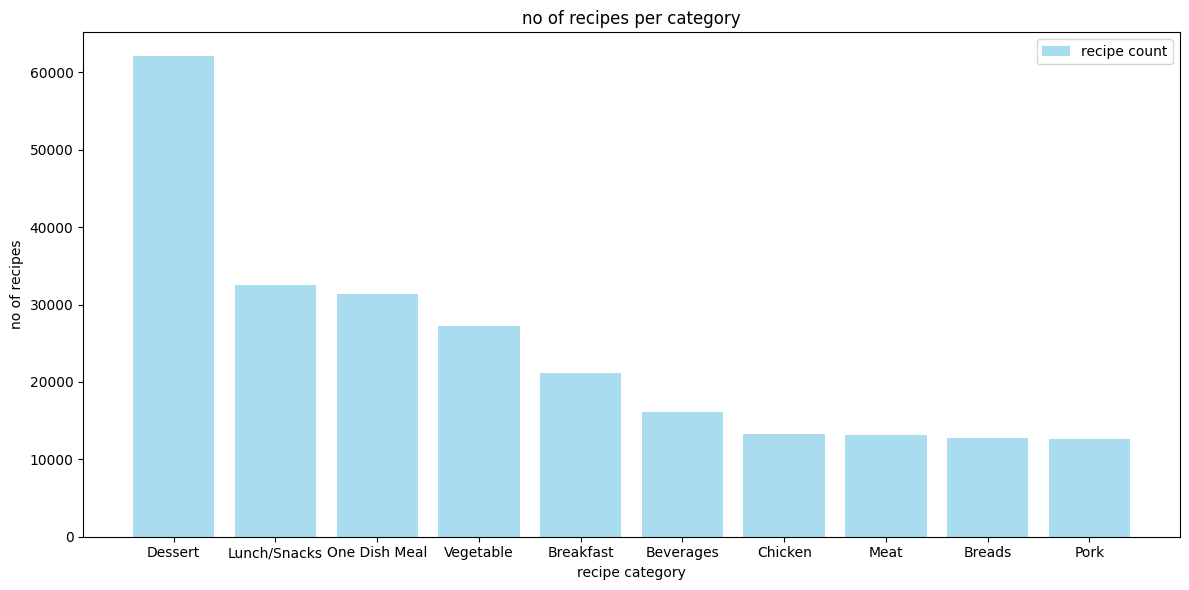

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_categories.index, top_categories.values, color='skyblue', alpha=0.7, label='recipe count')
plt.xlabel('recipe category')
plt.ylabel('no of recipes')
plt.title('no of recipes per category')
plt.legend()
plt.tight_layout()
plt.show()

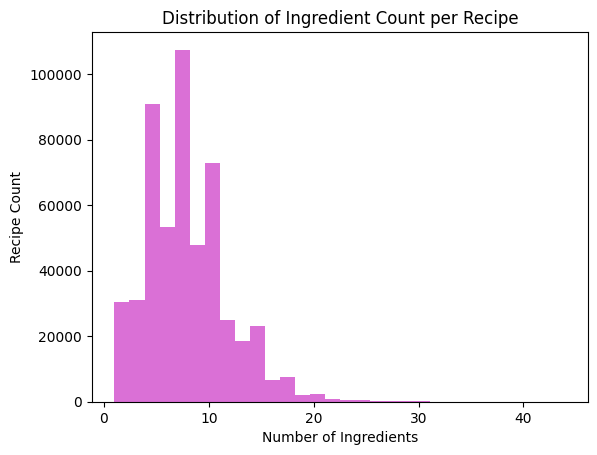

In [32]:
num_ingredients = recipes_df['ingredient_name'].apply(len)

plt.hist(num_ingredients, bins=30, color='orchid')
plt.xlabel('Number of Ingredients')
plt.ylabel('Recipe Count')
plt.title('Distribution of Ingredient Count per Recipe')
plt.show()

In [33]:
# lets see which recipes incluode the least ingredients

recipes_df['ingredient_count'] = recipes_df['ingredient_name'].apply(lambda x: len(x) if isinstance(x, list) else 0)
recipes_less_ing = recipes_df.sort_values(by='ingredient_count', ascending=True)
recipes_less_ing[['title', 'ingredient_name', 'ingredient_count']].head()

,title,ingredient_name,ingredient_count
420447,Sunflower Cookies for Kids! by --Tasty--,[Cream Cheese Frosting],1
396244,Heath Bar Angel Food Cake With Chocolate Whipp...,[character(0],1
261476,Easy Peanut Butter Kiss Cookies,[character(0],1
261457,Bread Poultice,[hot water],1
177130,Butterscotch Delight,[Amarula cream liqueur],1


In [34]:
(recipes_df[recipes_df['ingredient_count'] <= 2][['title', 'ingredient_name', 'ingredient_count']])


,title,ingredient_name,ingredient_count
8,A Jad - Cucumber Pickle,"[rice vinegar, haeo]",2
30,Chicha Peruana,"[piloncillo cone, Nottingham dry yeast]",2
85,Champagne Punch,"[frozen limeade concentrate, ginger ale]",2
90,Cherry Sandwich Maker Snack,[powdered sugar],1
92,Cheese and Pineapple Dip,"[cheese, pineapple]",2
...,...,...,...
522402,Cold Brew Matcha,[cold water],1
522406,Easy INDOOR S&rsquo;MORES,"[honey graham crackers, marshmallows]",2
522407,Boiled Eggs Instant Pot,"[water, eggs]",2
522419,Classic Creme Fraiche,"[cultured buttermilk, heavy cream]",2


In [35]:
recipes_df.to_csv('recipes.csv', index=False)